In [1]:
import pandas as pd
data = pd.Series([2114, 2468, 7119, 1876, 4105, 3183,
                  1932, 1355, 4278, 1030, 2000, 1077,
                  5835, 1512, 1697, 2478, 3981, 1643,
                  1858, 1500, 4608, 1000])
print(data)

v_max = data.max()
v_min = data.min()
n_classes = 6

0     2114
1     2468
2     7119
3     1876
4     4105
5     3183
6     1932
7     1355
8     4278
9     1030
10    2000
11    1077
12    5835
13    1512
14    1697
15    2478
16    3981
17    1643
18    1858
19    1500
20    4608
21    1000
dtype: int64


In [2]:
distribuicao_de_freq = data.value_counts(bins=n_classes).sort_index()
print(distribuicao_de_freq)

(993.88, 2019.833]      12
(2019.833, 3039.667]     3
(3039.667, 4059.5]       2
(4059.5, 5079.333]       3
(5079.333, 6099.167]     1
(6099.167, 7119.0]       1
dtype: int64


In [13]:
from math import ceil
nova_dist_freq = pd.DataFrame(distribuicao_de_freq)
nova_dist_freq = nova_dist_freq.reset_index()
nova_dist_freq.columns = ['Classe', 'Freq']

amplitude = ceil((v_max - v_min) / n_classes)
classes = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude)
print(classes)

nova_dist_freq['Classe'] = classes
display(nova_dist_freq)

IntervalIndex([(1000, 2020], (2020, 3040], (3040, 4060], (4060, 5080], (5080, 6100], (6100, 7120]], dtype='interval[int64, right]')


,Classe,Freq
0,"(1000, 2020]",12
1,"(2020, 3040]",3
2,"(3040, 4060]",2
3,"(4060, 5080]",3
4,"(5080, 6100]",1
5,"(6100, 7120]",1


In [14]:
pts_medios = [classe.mid for classe in classes]
print(pts_medios)

nova_dist_freq['Pontos medios'] = pts_medios

obs = len(data)
nova_dist_freq['Freq relativa'] = nova_dist_freq['Freq'] / obs
nova_dist_freq['Freq acumulada'] = nova_dist_freq['Freq'].cumsum()

display(nova_dist_freq)

[1510.0, 2530.0, 3550.0, 4570.0, 5590.0, 6610.0]


,Classe,Freq,Pontos medios,Freq relativa,Freq acumulada
0,"(1000, 2020]",12,1510.0,0.545455,12
1,"(2020, 3040]",3,2530.0,0.136364,15
2,"(3040, 4060]",2,3550.0,0.090909,17
3,"(4060, 5080]",3,4570.0,0.136364,20
4,"(5080, 6100]",1,5590.0,0.045455,21
5,"(6100, 7120]",1,6610.0,0.045455,22


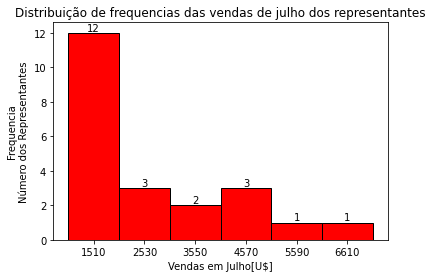

In [15]:
histograma = data.hist(bins=[classe.left for classe in classes] +
                       [nova_dist_freq['Classe'][n_classes - 1].right],
                       color = 'red', edgecolor = 'black', grid = False)

histograma.set(xlabel = 'Vendas em Julho[U$]',
               ylabel = 'Frequencia\nNúmero dos Representantes',
               title = 'Distribuição de frequencias das vendas de julho dos representantes',
               xticks = nova_dist_freq['Pontos medios'])

barras = histograma.patches
freqs = nova_dist_freq['Freq']
for barra, freq in zip(barras, freqs):
  altura = barra.get_height()
  histograma.text(barra.get_x() + barra.get_width() / 2, altura,
                  freq, ha = 'center', va = 'bottom')